In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


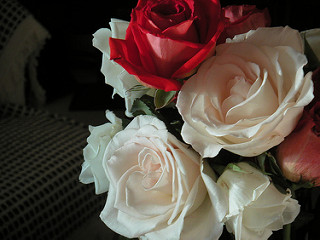

In [4]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

PIL.Image.open(str(roses[1]))

# read image to numpy array using OpenCV

In [5]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [6]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [7]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

# Transfer data

In [8]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        
X = np.array(X)
y = np.array(y)

In [9]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [10]:
num_classes = 5

model = Sequential([
    
    # CNN
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 41s 465ms/step - loss: 1.4751 - accuracy: 0.3892
Epoch 2/10
86/86 [==============================] - 39s 453ms/step - loss: 1.0179 - accuracy: 0.5996
Epoch 3/10
86/86 [==============================] - 40s 462ms/step - loss: 0.8571 - accuracy: 0.6708
Epoch 4/10
86/86 [==============================] - 39s 453ms/step - loss: 0.6819 - accuracy: 0.7460
Epoch 5/10
86/86 [==============================] - 40s 460ms/step - loss: 0.4483 - accuracy: 0.8405
Epoch 6/10
86/86 [==============================] - 42s 494ms/step - loss: 0.2866 - accuracy: 0.9008
Epoch 7/10
86/86 [==============================] - 37s 428ms/step - loss: 0.1706 - accuracy: 0.9451
Epoch 8/10
86/86 [==============================] - 39s 458ms/step - loss: 0.1156 - accuracy: 0.9677
Epoch 9/10
86/86 [==============================] - 39s 453ms/step - loss: 0.0682 - accuracy: 0.9844
Epoch 10/10
86/86 [==============================] - 39s 457ms/step - loss: 0.1528 - accura

In [11]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 6s 189ms/step - loss: 2.1795 - accuracy: 0.5871


[2.1794862747192383, 0.587145984172821]

# Improve Test Accuracy Using Data Augmentation

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
  ]
)

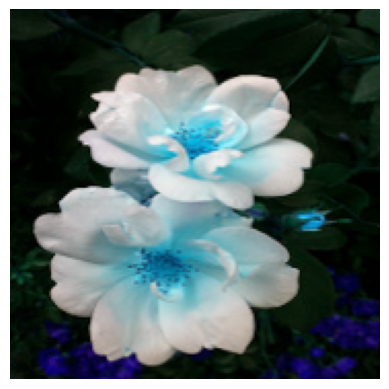

In [15]:
# original

plt.axis('off')
plt.imshow(X[0])

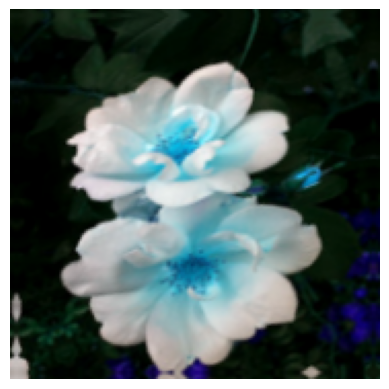

In [17]:
# new

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [18]:
num_classes = 5

model = Sequential([
    data_augmentation,
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 [==============================] - 37s 414ms/step - loss: 1.4069 - accuracy: 0.3757
Epoch 2/10
86/86 [==============================] - 42s 491ms/step - loss: 1.0934 - accuracy: 0.5552
Epoch 3/10
86/86 [==============================] - 47s 542ms/step - loss: 0.9845 - accuracy: 0.6156
Epoch 4/10
86/86 [==============================] - 46s 537ms/step - loss: 0.8984 - accuracy: 0.6577
Epoch 5/10
86/86 [==============================] - 48s 559ms/step - loss: 0.8455 - accuracy: 0.6704
Epoch 6/10
86/86 [==============================] - 37s 421ms/step - loss: 0.8023 - accuracy: 0.6951
Epoch 7/10
86/86 [==============================] - 32s 374ms/step - loss: 0.7638 - accuracy: 0.7053
Epoch 8/10
86/86 [==============================] - 30s 347ms/step - loss: 0.7374 - accuracy: 0.7206
Epoch 9/10
86/86 [==============================] - 32s 377ms/step - loss: 0.7000 - accuracy: 0.7300
Epoch 10/10
86/86 [==============================] - 33s 380ms/step - loss: 0.6645 - accura

In [19]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 94ms/step - loss: 0.8120 - accuracy: 0.7092


[0.811983585357666, 0.7091503143310547]